# Anyonic models

We solve the almost-bosonic anyon model of https://arxiv.org/pdf/1901.10739.pdf

Iter     Function value   Gradient norm 
     0     8.173902e+01     1.318906e+01
 * time: 0.0024127960205078125
     1     6.198428e+01     1.062790e+01
 * time: 0.00677490234375
     2     5.602680e+01     1.332206e+01
 * time: 0.06907081604003906
     3     4.032675e+01     8.531480e+00
 * time: 0.08292698860168457
     4     2.997434e+01     6.981609e+00
 * time: 0.0956578254699707
     5     2.462221e+01     5.542792e+00
 * time: 0.11012578010559082
     6     1.120836e+01     2.174833e+00
 * time: 0.12490200996398926
     7     8.131734e+00     2.902544e+00
 * time: 0.13738489151000977
     8     6.780644e+00     1.592638e+00
 * time: 0.18467497825622559
     9     6.638813e+00     3.316308e+00
 * time: 0.19307184219360352
    10     6.146572e+00     1.970792e+00
 * time: 0.2025737762451172
    11     6.057162e+00     3.576209e+00
 * time: 0.20998287200927734
    12     5.903148e+00     3.001223e+00
 * time: 0.21744394302368164
    13     5.707939e+00     2.039796e+00
 * time: 0.

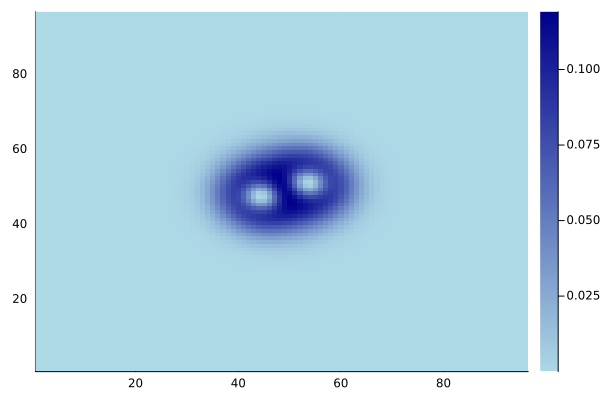

In [1]:
using DFTK
using StaticArrays
using Plots

# Unit cell. Having one of the lattice vectors as zero means a 2D system
a = 14
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

# Confining scalar potential
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2);

# Parameters
Ecut = 50
n_electrons = 1
β = 5;

# Collect all the terms, build and run the model
terms = [Kinetic(; scaling_factor=2),
         ExternalFromReal(X -> pot(X...)),
         Anyonic(1, β)
]
model = Model(lattice; n_electrons, terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model; Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-14)  # Reduce tol for production
E = scfres.energies.total
s = 2
E11 = π/2 * (2(s+1)/s)^((s+2)/s) * (s/(s+2))^(2(s+1)/s) * E^((s+2)/s) / β
println("e(1,1) / (2π)= ", E11 / (2π))
heatmap(scfres.ρ[:, :, 1, 1], c=:blues)